In [41]:
# 导入所需库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['font.sans-serif']= ['Heiti TC']#防止中文乱码
plt.rcParams['axes.unicode_minus']=False#解决负号'-'显示为方块的问题
import warnings
warnings.filterwarnings('ignore')

In [42]:
# 导入数据
filepath='E-Commerce-Visitor-Data.csv'
data_train=pd.read_csv(filepath,encoding='utf-8')
#使用encoding=utf-8可以使得pandas读入中文字符

In [43]:
data_train.head()

,访客类型,月份,产品相关页面访问持续时间,信息相关页面,用户相关页面,信息相关页面访问持续时间,退出率,跳出率,产品相关页面,网页价值,操作系统,周末,浏览器,用户页面访问持续时间,区域,流量类型,节假日,是否购买
0,Returning_Visitor,Dec,556.916667,0,0,0.000000,0.022436,0.010256,26,0.0,4,False,2,0.00,1,8,0.0,0
1,Returning_Visitor,Dec,2348.812500,5,0,39.833333,0.055167,0.020000,34,0.0,2,False,2,0.00,3,1,0.0,0
2,New_Visitor,June,1570.133333,6,0,89.800000,0.005357,0.000000,26,0.0,2,True,2,0.00,8,4,0.0,0
3,Returning_Visitor,Dec,821.682540,4,2,159.000000,0.019343,0.000617,33,0.0,2,False,2,27.75,1,2,0.0,1
4,Returning_Visitor,Jul,584.377778,5,2,38.577778,0.064352,0.000000,7,0.0,1,True,1,9.00,1,2,0.0,1


In [44]:
# 了解数据的基本情况
data_train.info()
print(data_train.head())
#data_train.head()会将excel表格第一行看作列名，并默认读取前五行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   访客类型          8631 non-null   object 
 1   月份            8631 non-null   object 
 2   产品相关页面访问持续时间  8631 non-null   float64
 3   信息相关页面        8631 non-null   int64  
 4   用户相关页面        8631 non-null   int64  
 5   信息相关页面访问持续时间  8631 non-null   float64
 6   退出率           8631 non-null   float64
 7   跳出率           8631 non-null   float64
 8   产品相关页面        8631 non-null   int64  
 9   网页价值          8631 non-null   float64
 10  操作系统          8631 non-null   int64  
 11  周末            8631 non-null   bool   
 12  浏览器           8631 non-null   int64  
 13  用户页面访问持续时间    8631 non-null   float64
 14  区域            8631 non-null   int64  
 15  流量类型          8631 non-null   int64  
 16  节假日           8631 non-null   float64
 17  是否购买          8631 non-null   int64  
dtypes: bool(1), float64(7), int6

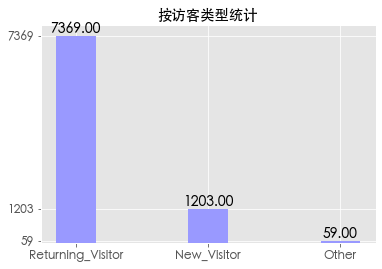

In [45]:
#绘图，用柱状图完成访客类型的可视化
#设置画图的尺寸
visitor_type=data_train[['访客类型']]#visitor_type.sort_values(by='访客类型', inplace=True)
xx =visitor_type['访客类型'].unique()#使用unqiue，去除重复元素，并按元素从大到小返回一个新的无元素的元组或列表
yy =visitor_type['访客类型'].value_counts()#使用value_counts，默认显示数字形式，默认排序，默认降序，默认删除NA
plt.bar(xx, yy, width=0.3, facecolor='#9999ff')#绘制条形图
a=np.arange(len(xx))#np.arange()返回一个有终点和起点的固定步长的排列
for a,b in zip(a, yy):
    plt.text(a, b, '%.2f'%b, ha='center', va='bottom', fontsize=14)#设置数字标签
plt.xticks(xx,fontsize=12)
plt.yticks(yy,fontsize=12)
plt.title('按访客类型统计')#设置x、y轴标签与图形标题
plt.savefig('/Users/yangzhaoyu/Desktop/1.png')
plt.show()

In [46]:
#计算初次访客与回头客的购买率
group=data_train.groupby('访客类型')
#groupby()的作用是进行数据的分组以及分组后的组内运算
New_V=group.get_group('New_Visitor')
New_V_rate=len(New_V[New_V['是否购买']==1])/len(New_V)
#1为购买，0为未购买，用户购买行为数据集中有体现
Returning_V=group.get_group('Returning_Visitor')
Returning_V_rate=len(Returning_V[Returning_V['是否购买']==1])/len(Returning_V)
print('回头客的购买率:',Returning_V_rate)
print('初次访客的购买率:',New_V_rate)

回头客的购买率: 0.14018184285520424
初次访客的购买率: 0.24189526184538654


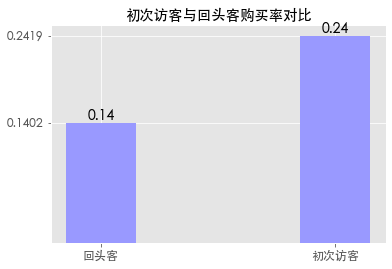

In [47]:
xx =['回头客','初次访客']#使用unqiue，去除重复元素，并按元素从大到小返回一个新的无元素的元组或列表
yy =[Returning_V_rate,New_V_rate]#使用value_counts，默认显示数字形式，默认排序，默认降序，默认删除NA
plt.bar(xx, yy, width=0.3, facecolor='#9999ff')#绘制条形图
a=np.arange(len(xx))#np.arange()返回一个有终点和起点的固定步长的排列
for a,b in zip(a, yy):
    plt.text(a, b, '%.2f'%b, ha='center', va='bottom', fontsize=14)#设置数字标签
plt.xticks(xx,fontsize=12)
plt.yticks(yy,fontsize=12)
plt.title('初次访客与回头客购买率对比')#设置x、y轴标签与图形标题
plt.savefig('/Users/yangzhaoyu/Desktop/2.png')
plt.show()

In [48]:
#计算工作日与周末的购买率,请参考计算初次访客和回头客的方法完成这部分的计算
group=data_train.groupby('周末')
weekends=group.get_group(True)
weekends_rate=len(weekends[weekends['是否购买']==1])/len(weekends)
workdays=group.get_group(False)
workdays_rate=len(workdays[workdays['是否购买']==1])/len(workdays)
print('周末的购买率:',weekends_rate)
print('工作日的购买率:',workdays_rate)

周末的购买率: 0.17365564874198322
工作日的购买率: 0.14900060569351908


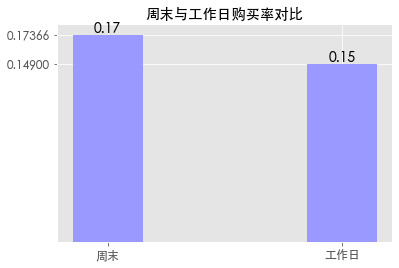

In [49]:
xx =['周末','工作日']#使用unqiue，去除重复元素，并按元素从大到小返回一个新的无元素的元组或列表
yy =[weekends_rate,workdays_rate]#使用value_counts，默认显示数字形式，默认排序，默认降序，默认删除NA
plt.bar(xx, yy, width=0.3, facecolor='#9999ff')#绘制条形图
a=np.arange(len(xx))#np.arange()返回一个有终点和起点的固定步长的排列
for a,b in zip(a, yy):
    plt.text(a, b, '%.2f'%b, ha='center', va='bottom', fontsize=14)#设置数字标签
plt.xticks(xx,fontsize=12)
plt.yticks(yy,fontsize=12)
plt.title('周末与工作日购买率对比')#设置x、y轴标签与图形标题
plt.savefig('/Users/yangzhaoyu/Desktop/3.png')
plt.show()

In [50]:
sum(data_train[data_train['月份']=='Feb']['是否购买']==1)

2

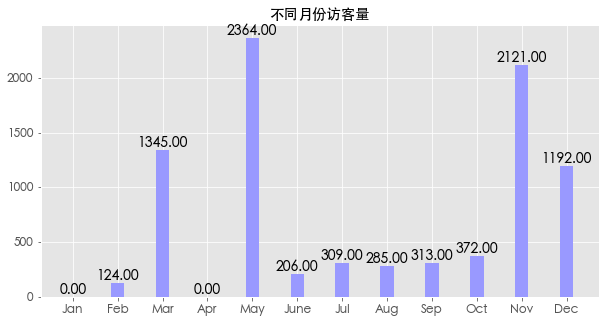

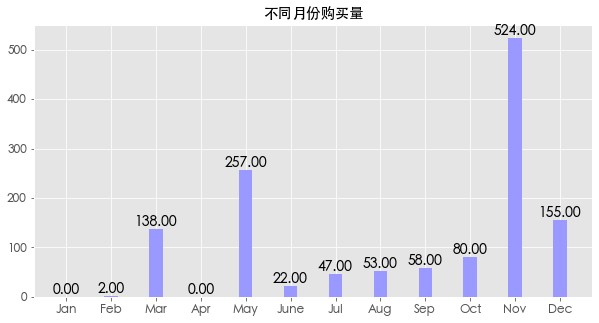

In [51]:
#不同月份的访客量
plt.figure(figsize=(10,5))
#设置画图的尺寸
xx = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
yy = []
for i in range(len(xx)):
    yy.append(len(data_train[data_train['月份']==xx[i]]))#append()在列表末尾添加一个元素
plt.bar(xx,yy,width=0.3,facecolor='#9999ff')#绘制条形图
a=np.arange(len(xx))
for a,b in zip(a,yy):
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=14)
#设置数字标签
plt.xticks(xx,fontsize=12)
plt.yticks(fontsize=12)
plt.title('不同月份访客量')
#设置x、y轴标签与图形标题
plt.savefig('/Users/yangzhaoyu/Desktop/4.png')
plt.show()


#不同月份的购买量
#请按照上部分内容自主完成
plt.figure(figsize=(10,5))
xx2=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
yy2=[]
for i in range(len(xx2)):
    yy2.append(sum(data_train[data_train['月份']==xx2[i]]['是否购买']==1))
plt.bar(xx2,yy2,width=0.3,facecolor='#9999ff')#设置条形图
a=np.arange(len(xx2))
for a,b in zip(a,yy2):
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=14)
plt.xticks(xx,fontsize=12)
plt.yticks(fontsize=12)
plt.title('不同月份购买量')
plt.savefig('/Users/yangzhaoyu/Desktop/5.png')
plt.show()

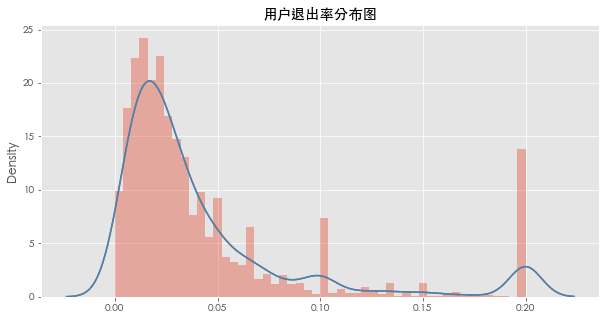

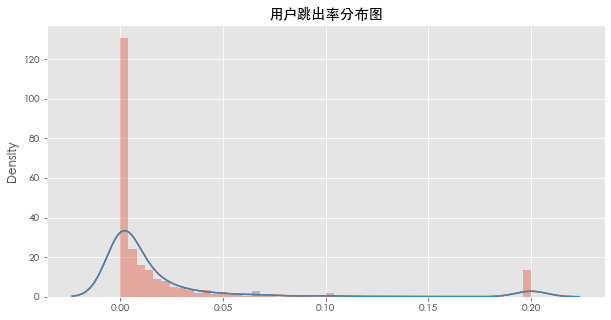

In [53]:
#用分布图展示用户退出率和跳出率的分布情况
plt.figure(figsize=(10,5))#设置画图的尺寸
xx=data_train[['退出率']]
sns.distplot(xx)#, color='b', rug=True)
sns.distplot(xx, hist=False)#不显示直方图
plt.title('用户退出率分布图')
plt.savefig('/Users/yangzhaoyu/Desktop/6.png')
plt.show()#plt.hist

plt.figure(figsize=(10,5))
xx2=data_train[['跳出率']]
sns.distplot(xx2)
sns.distplot(xx2, hist=False)
plt.title('用户跳出率分布图')
plt.savefig('/Users/yangzhaoyu/Desktop/7.png')
plt.show()

In [11]:
#由于数据集中访客类型，月份，周末这三块是字符，为完成建模，首先需要用LabelEncoder将其编码。
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data_train['访客类型']= label.fit_transform(data_train['访客类型'])#这一步完成后会将New_Vistor设置成0，Returning_Vistor设置成2，Others设置成1
data_train['月份']= label.fit_transform(data_train['月份'])#根据每个月份的英文字母顺序，将其排序，从0到11
data_train['周末']= label.fit_transform(data_train['周末'])#是周末就是1，不是周末就是0
print(data_train.head())

   访客类型  月份  产品相关页面访问持续时间  信息相关页面  用户相关页面  信息相关页面访问持续时间       退出率       跳出率  \
0     2   1    556.916667       0       0      0.000000  0.022436  0.010256   
1     2   1   2348.812500       5       0     39.833333  0.055167  0.020000   
2     0   4   1570.133333       6       0     89.800000  0.005357  0.000000   
3     2   1    821.682540       4       2    159.000000  0.019343  0.000617   
4     2   3    584.377778       5       2     38.577778  0.064352  0.000000   

   产品相关页面  网页价值  操作系统  周末  浏览器  用户页面访问持续时间  区域  流量类型  节假日  是否购买  
0      26   0.0     4   0    2        0.00   1     8  0.0     0  
1      34   0.0     2   0    2        0.00   3     1  0.0     0  
2      26   0.0     2   1    2        0.00   8     4  0.0     0  
3      33   0.0     2   0    2       27.75   1     2  0.0     1  
4       7   0.0     1   1    1        9.00   1     2  0.0     1  


In [12]:
data_train.describe()

,访客类型,月份,产品相关页面访问持续时间,信息相关页面,用户相关页面,信息相关页面访问持续时间,退出率,跳出率,产品相关页面,网页价值,操作系统,周末,浏览器,用户页面访问持续时间,区域,流量类型,节假日,是否购买
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,1.714402,5.183640,1178.095315,2.309929,0.497741,81.949926,0.042785,0.021848,31.281891,5.762836,2.127216,0.234851,2.360908,33.396601,3.160584,4.146333,0.061522,0.154791
std,0.694874,2.350216,1906.680808,3.316519,1.252284,179.167643,0.048030,0.047833,43.942097,17.771647,0.905776,0.423930,1.719117,136.636499,2.388012,4.074056,0.198678,0.361726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,5.000000,185.000000,0.000000,0.000000,0.000000,0.014286,0.000000,7.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,2.000000,6.000000,590.516667,1.000000,0.000000,8.000000,0.025289,0.003047,18.000000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000
75%,2.000000,7.000000,1448.840476,4.000000,0.000000,93.500000,0.050000,0.017143,37.000000,0.000000,3.000000,0.000000,2.000000,0.000000,4.000000,4.000000,0.000000,0.000000
max,2.000000,9.000000,63973.522230,27.000000,16.000000,3398.750000,0.200000,0.200000,686.000000,360.953384,8.000000,1.000000,13.000000,2549.375000,9.000000,20.000000,1.000000,1.000000


In [13]:
#找到没有购买的客户数据，对其中的大一点数值型变量进行min,max规模化，即将每个数字-减去其所属变量的最小值，然后除以所属变量最大值最小值之差。
#规模化的目的是为了让所有变量的数值都统一在一个规模里，这样建模更加精确
data_train2=data_train.loc[data_train["是否购买"]==0]#提取所有未购买的用户数据
data_train2=data_train2.reset_index(drop='index')
data_use=data_train2[['产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间']]
scaler=preprocessing.MinMaxScaler()
data2=scaler.fit_transform(data_use)
data=pd.DataFrame(data2,columns=['产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间'])
data=pd.concat([data,data_train2[['访客类型','退出率','跳出率']]],axis=1)
data

,产品相关页面访问持续时间,信息相关页面访问持续时间,用户页面访问持续时间,访客类型,退出率,跳出率
0,0.008705,0.000000,0.000000,2,0.022436,0.010256
1,0.036715,0.011720,0.000000,2,0.055167,0.020000
2,0.024543,0.026421,0.000000,0,0.005357,0.000000
3,0.010043,0.000000,0.000000,2,0.057143,0.028571
4,0.183348,0.000000,0.030047,2,0.045246,0.032877
...,...,...,...,...,...,...
7290,0.006292,0.009268,0.000000,2,0.002500,0.000000
7291,0.032986,0.078097,0.014003,2,0.009762,0.003614
7292,0.047494,0.000000,0.000000,2,0.038333,0.017535
7293,0.046106,0.009636,0.004315,2,0.027165,0.015909


In [14]:
#对数据进行k=4的K—Means聚类，也就是分成4个类，并且设置label变量标注其所属类
model_kmeans=KMeans(n_clusters=4 ,random_state=9)
model_kmeans.fit(data)
Kmeans_labels=pd.DataFrame(model_kmeans.labels_,columns=['labels'])
kmeans_data=pd.concat((data,Kmeans_labels),axis=1)
print(kmeans_data)

      产品相关页面访问持续时间  信息相关页面访问持续时间  用户页面访问持续时间  访客类型       退出率       跳出率  labels
0         0.008705      0.000000    0.000000     2  0.022436  0.010256       2
1         0.036715      0.011720    0.000000     2  0.055167  0.020000       2
2         0.024543      0.026421    0.000000     0  0.005357  0.000000       1
3         0.010043      0.000000    0.000000     2  0.057143  0.028571       2
4         0.183348      0.000000    0.030047     2  0.045246  0.032877       2
...            ...           ...         ...   ...       ...       ...     ...
7290      0.006292      0.009268    0.000000     2  0.002500  0.000000       2
7291      0.032986      0.078097    0.014003     2  0.009762  0.003614       2
7292      0.047494      0.000000    0.000000     2  0.038333  0.017535       2
7293      0.046106      0.009636    0.004315     2  0.027165  0.015909       2
7294      0.075303      0.098320    0.013337     2  0.009553  0.002685       2

[7295 rows x 7 columns]


In [15]:
data_train.loc[data_train["是否购买"]==1][['访客类型','产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间','退出率','跳出率']].describe()

,访客类型,产品相关页面访问持续时间,信息相关页面访问持续时间,用户页面访问持续时间,退出率,跳出率
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,1.555389,1794.509725,122.380807,56.532193,0.019575,0.004944
std,0.826482,2211.142623,205.547079,172.851200,0.015736,0.010467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,535.750000,0.000000,0.000000,0.009318,0.000000
50%,2.000000,1088.848810,53.400000,0.000000,0.015874,0.000000
75%,2.000000,2193.660101,152.125000,14.500000,0.025000,0.006452
max,2.000000,27009.859430,2086.750000,1665.066667,0.200000,0.200000


In [16]:
print(data_train2.loc[kmeans_data[kmeans_data['labels']==0].index][['访客类型','产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间','退出率','跳出率']].describe())
data_train2.loc[kmeans_data[kmeans_data['labels']==0].index][['访客类型','产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间','退出率','跳出率']]['访客类型'].value_counts()

        访客类型  产品相关页面访问持续时间  信息相关页面访问持续时间  用户页面访问持续时间         退出率         跳出率
count  602.0    602.000000    602.000000  602.000000  602.000000  602.000000
mean     2.0     51.454784      0.664618    0.056811    0.185867    0.177777
std      0.0    197.284581      8.724488    1.393888    0.025666    0.039387
min      2.0      0.000000      0.000000    0.000000    0.100000    0.064286
25%      2.0      0.000000      0.000000    0.000000    0.180000    0.166667
50%      2.0      0.000000      0.000000    0.000000    0.200000    0.200000
75%      2.0      4.750000      0.000000    0.000000    0.200000    0.200000
max      2.0   2251.280000    180.133333   34.200000    0.200000    0.200000


2    602
Name: 访客类型, dtype: int64

In [17]:
print(data_train2.loc[kmeans_data[kmeans_data['labels']==1].index][['访客类型','产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间','退出率','跳出率']].describe())
data_train2.loc[kmeans_data[kmeans_data['labels']==1].index][['访客类型','产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间','退出率','跳出率']]['访客类型'].value_counts()

        访客类型  产品相关页面访问持续时间  信息相关页面访问持续时间   用户页面访问持续时间         退出率         跳出率
count  912.0    912.000000    912.000000   912.000000  912.000000  912.000000
mean     0.0    569.221235     96.036619    19.017758    0.022201    0.005712
std      0.0    785.971636    166.523333    92.886109    0.029331    0.027126
min      0.0      0.000000      0.000000     0.000000    0.000000    0.000000
25%      0.0    139.408333      0.000000     0.000000    0.007407    0.000000
50%      0.0    338.670000     53.190476     0.000000    0.014286    0.000000
75%      0.0    687.413636    122.200000     0.000000    0.025000    0.000000
max      0.0  12983.787710   1946.000000  1779.166667    0.200000    0.200000


0    912
Name: 访客类型, dtype: int64

In [18]:
print(data_train2.loc[kmeans_data[kmeans_data['labels']==2].index][['访客类型','产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间','退出率','跳出率']].describe())
data_train2.loc[kmeans_data[kmeans_data['labels']==2].index][['访客类型','产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间','退出率','跳出率']]['访客类型'].value_counts()

         访客类型  产品相关页面访问持续时间  信息相关页面访问持续时间   用户页面访问持续时间          退出率  \
count  5734.0   5734.000000   5734.000000  5734.000000  5734.000000   
mean      2.0   1255.392686     79.014892    33.967194     0.036103   
std       0.0   1980.909200    180.151397   139.545416     0.027579   
min       2.0      0.000000      0.000000     0.000000     0.000000   
25%       2.0    236.250000      0.000000     0.000000     0.016534   
50%       2.0    660.051190      3.000000     0.000000     0.028283   
75%       2.0   1573.626042     87.000000     0.000000     0.048619   
max       2.0  63973.522230   3398.750000  2549.375000     0.200000   

               跳出率  
count  5734.000000  
mean      0.011698  
std       0.017321  
min       0.000000  
25%       0.000000  
50%       0.004332  
75%       0.016667  
max       0.100000  


2    5734
Name: 访客类型, dtype: int64

In [19]:
print(data_train2.loc[kmeans_data[kmeans_data['labels']==3].index][['访客类型','产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间','退出率','跳出率']].describe())
data_train2.loc[kmeans_data[kmeans_data['labels']==3].index][['访客类型','产品相关页面访问持续时间','信息相关页面访问持续时间','用户页面访问持续时间','退出率','跳出率']]['访客类型'].value_counts()

       访客类型  产品相关页面访问持续时间  信息相关页面访问持续时间  用户页面访问持续时间        退出率        跳出率
count  47.0     47.000000     47.000000   47.000000  47.000000  47.000000
mean    1.0    471.243820     58.556738   12.186525   0.084383   0.056454
std     0.0   1449.764147    248.544338   54.444138   0.076631   0.090055
min     1.0      0.000000      0.000000    0.000000   0.002041   0.000000
25%     1.0      0.000000      0.000000    0.000000   0.023611   0.000000
50%     1.0     70.500000      0.000000    0.000000   0.050000   0.000000
75%     1.0    386.833333      3.500000    0.000000   0.200000   0.200000
max     1.0   9630.209524   1652.000000  302.000000   0.200000   0.200000


1    47
Name: 访客类型, dtype: int64

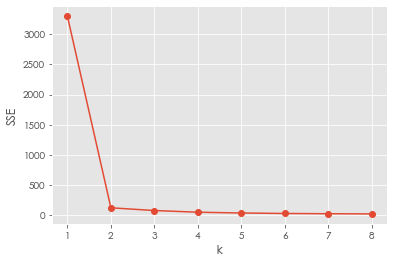

In [20]:
#根据每个k值对应的SSE，即每个数值到其所属类别中心点的距离平方和。找出最优的k，即过了该点之后SSE的值下降非常缓慢。
data=data.fillna(0)
SSE=[]
for k in range(1,9):
    estimator=KMeans(n_clusters=k)
    estimator.fit(data.values)
    #这里需要将data转化为array的形式才可以fit哦~
    SSE.append(estimator.inertia_)

X=range(1,9)
#可视化呈现
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()
#根据可视化结果，如果你觉得k=4并不是最优的，可以用最优的k值重新聚类

0.7702647285991773


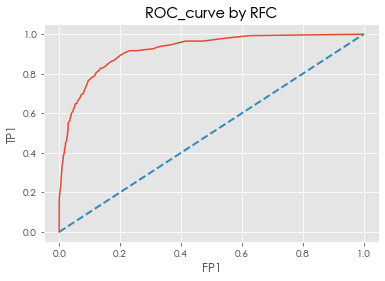

In [21]:
#建模所需库
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
#分割X与Y
X=data_train.drop(columns='是否购买')#令x去掉‘是否购买’这一列
y=data_train['是否购买']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_probas = clf.predict_proba(X_test)
y_scores = y_probas[:,1]#关键一步得到scores
fpr1,tpr1,thresh1 = roc_curve(y_test,y_scores)
plt.title('ROC_curve by RFC')
plt.xlabel('FP1')
plt.ylabel('TP1')
plt.plot(fpr1,tpr1)
plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
test_auc = roc_auc_score(y_test,y_pred)
print(test_auc)

0.6745087599223039


Text(0, 0.5, 'TP2')

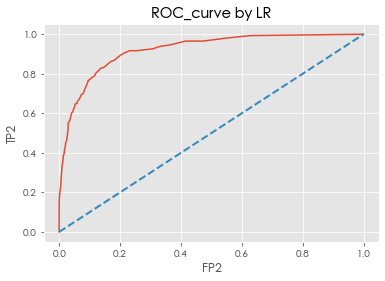

In [22]:
#根据以上的随机森林预测模型，尝试使用Logistic模型进行预测
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
X=data_train.drop(columns='是否购买')
y=data_train['是否购买']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
clf2=LogisticRegression()
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)
y_probas2 = clf2.predict_proba(X_test)
y_scores2 = y_probas2[:,1]#关键一步得到scores
fpr2,tpr2,thresh2 = roc_curve(y_test,y_scores)
test_auc2 = roc_auc_score(y_test,y_pred2)
print(test_auc2)
#完成绘图部分
plt.plot(fpr2,tpr2)
plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
plt.title('ROC_curve by LR')
plt.xlabel('FP2')
plt.ylabel('TP2')


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 第一次调参
param_test1 = {'n_estimators': range(10, 100, 10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(min_samples_split=100,
                                                         min_samples_leaf=20, max_depth=8, max_features='sqrt', random_state=10),
                       param_grid=param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(X_train, y_train)
print(gsearch1.best_params_)

# 第二次调参
param_test2 = {'max_depth': range(3, 14, 2), 'min_samples_split': range(50, 201, 20)}
gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=70,
                                                         min_samples_leaf=20, oob_score=True, random_state=10),
                       param_grid=param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(X_train, y_train)
print(gsearch2.best_params_)

# 第三次调参
param_test3 = {'min_samples_split': range(80, 150, 20), 'min_samples_leaf': range(10, 60, 10)}
gsearch3 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=70, max_depth=7, min_samples_split=50,
                                                         oob_score=True, random_state=10),
                       param_grid=param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(X_train, y_train)
print(gsearch3.best_params_)

# 第四次调参
param_test4 = {'max_features': range(3, 8, 2)}
gsearch4 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=70, max_depth=7, min_samples_split=50,
                                                         min_samples_leaf=20, oob_score=True, random_state=10),
                       param_grid=param_test4, scoring='roc_auc', cv=5)
gsearch4.fit(X_train, y_train)
print(gsearch4.best_params_)

{'n_estimators': 90}
{'max_depth': 11, 'min_samples_split': 90}
{'min_samples_leaf': 10, 'min_samples_split': 120}
{'max_features': 7}


0.76952390147286


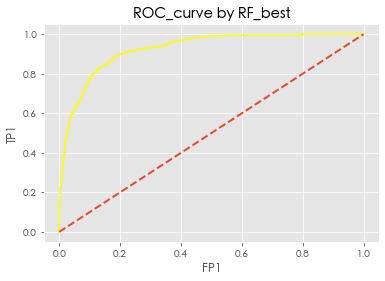

In [64]:
#根据调参结果再次进行随机森林预测
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
clf_best=RandomForestClassifier(n_estimators=90,max_depth=11,min_samples_split=90,min_samples_leaf=80,max_features=7)
clf_best.fit(X_train,y_train)
y_pred=clf_best.predict(X_test)
y_probas = clf_best.predict_proba(X_test)
y_scores = y_probas[:,1]#关键一步得到scores
fpr1,tpr1,thresh1 = roc_curve(y_test,y_scores)
plt.title('ROC_curve by RF_best')
plt.xlabel('FP1')
plt.ylabel('TP1')
plt.plot(fpr1,tpr1,color='yellow')
plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
test_auc = roc_auc_score(y_test,y_pred)
print(test_auc)